In [20]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Load Data

In [2]:
df = pd.read_csv('data/Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2. Exploratory Data Analysis

#### a. Data Overview

In [3]:
#Check the size of the dataframe
df.shape

(3333, 21)

In [4]:
#Statistical description of Numeric Features in dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#Display data types and number of Null in each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Check for duplicated rows
df.duplicated().sum()

0

False    2850
True      483
Name: churn, dtype: int64
False    0.855086
True     0.144914
Name: churn, dtype: float64


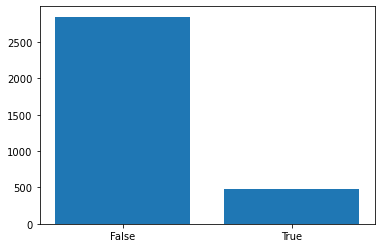

In [7]:
# Analyse the imbalance of dependent variable (Target column)
target = df.churn.value_counts()
print(target)
print(df.churn.value_counts(normalize = True))
plt.bar(target.index, target.values, tick_label = target.index);

This public dataset is provided by the Kaggle community. It contains 20 predictor variables mostly about customer usage patterns. There are 3333 records in this dataset, out of which 483 customers are churners and the remaining 2850 are non-churners. Thus, the ratio of churners in this dataset is 14%.

Summary of Features in the Dataset
- state: the state the customer lives in
- account length: the number of days the customer has had an account
- area code: the area code of the customer
- phone number: the phone number of the customer
- international plan: true if the customer has the international plan, otherwise false
- voice mail plan: true if the customer has the voice mail plan, otherwise false
- number vmail messages: the number of voicemails the customer has sent
- total day minutes: total number of minutes the customer has been in calls during the day
- total day calls: total number of calls the user has done during the day
- total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
- total eve minutes: total number of minutes the customer has been in calls during the evening
- total eve calls: total number of calls the customer has done during the evening
- total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
- total night minutes: total number of minutes the customer has been in calls during the night
- total night calls: total number of calls the customer has done during the night
- total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
- total intl minutes: total number of minutes the user has been in international calls
- total intl calls: total number of international calls the customer has done
- total intl charge: total amount of money the customer was charged by the Telecom company for international calls
- customer service calls: number of calls the customer has made to customer service
- churn: true if the customer terminated their contract, otherwise false

#### b. Categorical Features Analysis

Phone number feature is irrelevant as the churn target should not be impacted by customers' phone numbers. Thus, I will drop phone numbers out of list of features.
On the other hand, although area code is numeric feature in the dataframe, it should be converted to categorical.

In [8]:
df.drop('phone number', axis = 1, inplace = True)
df['area code'] = df['area code'].apply(str)

In [9]:
#Select features with categorical values
cat_features = df.select_dtypes("object").columns
df[cat_features].nunique()

state                 51
area code              3
international plan     2
voice mail plan        2
dtype: int64

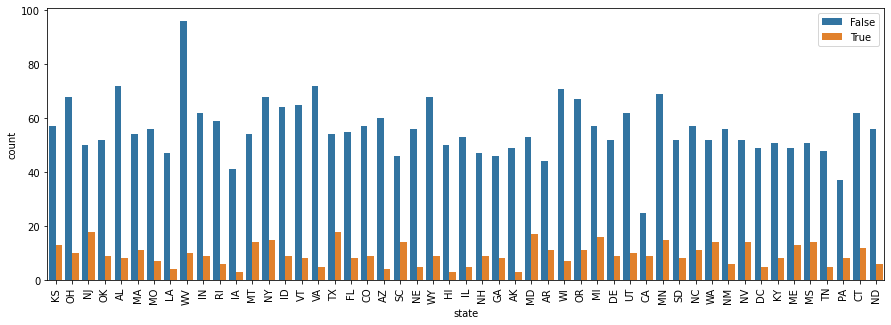

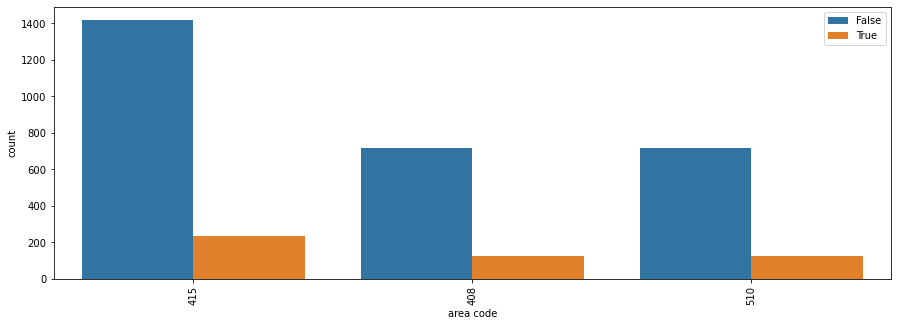

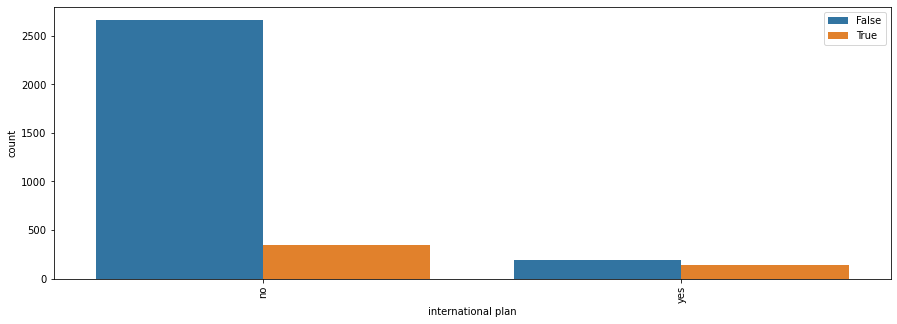

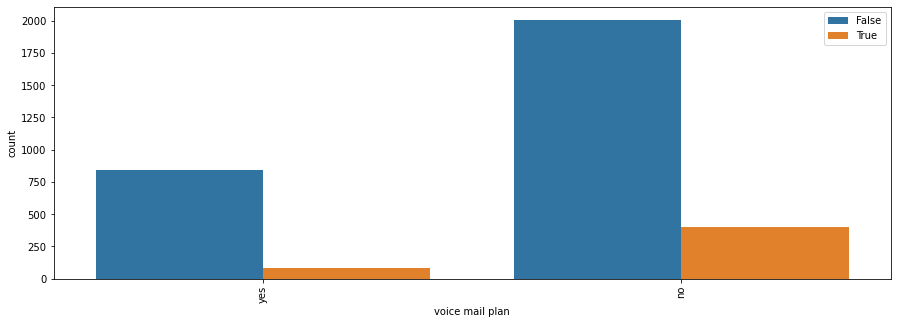

In [10]:
for i in cat_features:
    plt.figure(figsize=(15,5))
    sns.countplot(x=i, hue="churn", data=df)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

#### c. Numerical Features Analysis

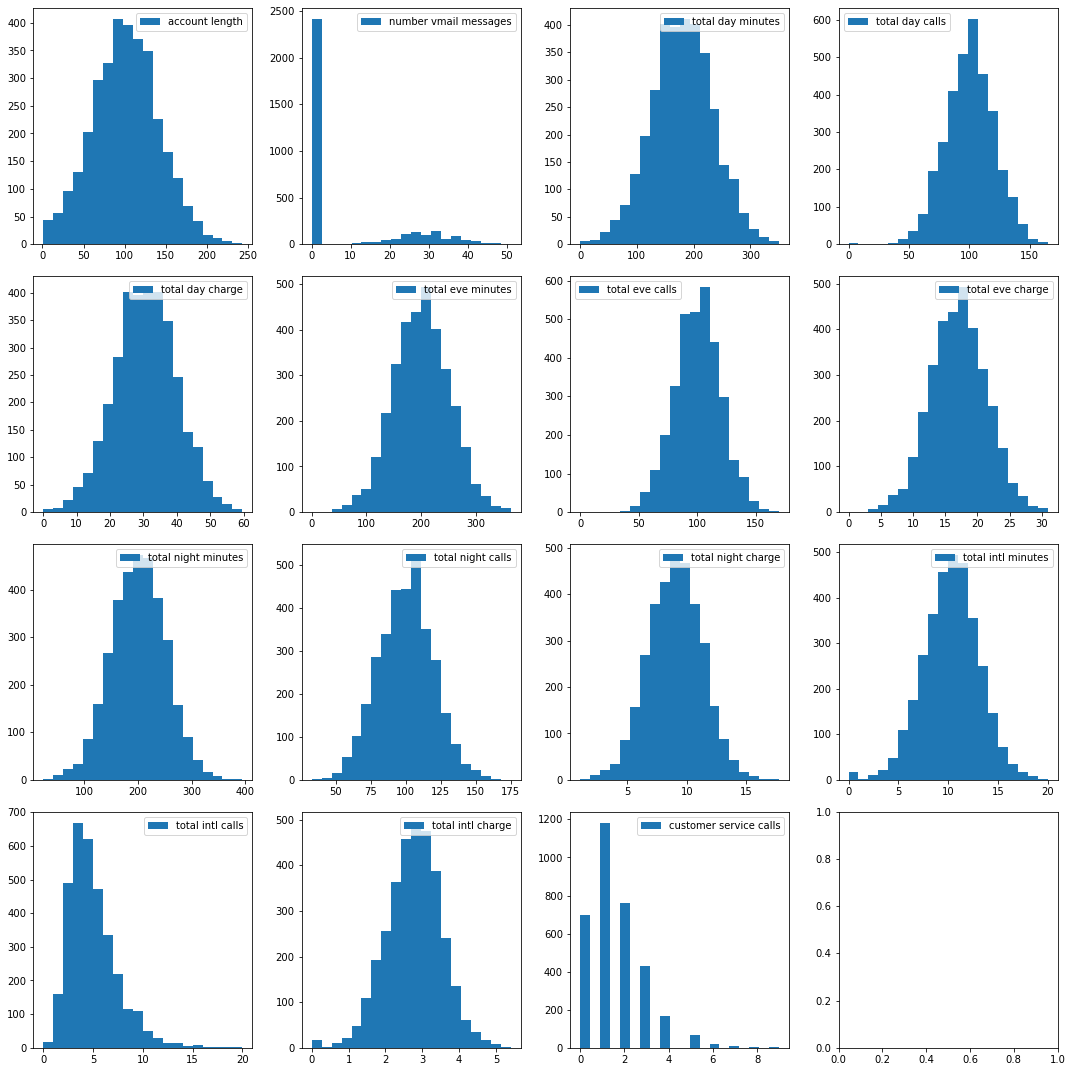

In [11]:
#Select features with numeric values
numeric_features = df.select_dtypes('number').columns

fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (15,15))
for i in range(len(numeric_features)):
    col = i%4
    row = i//4
    ax[row][col].hist(df[numeric_features[i]], label = numeric_features[i], bins = 20)
    ax[row][col].legend()
plt.tight_layout()

- For the distribution of the numeric features, all features except for number of voice mail messages and customer service calls are normally distributed.
- Although total international call is normally distributed, it seems to be skewed with a right tail.

Next, I will investigate the correlations among numerical features

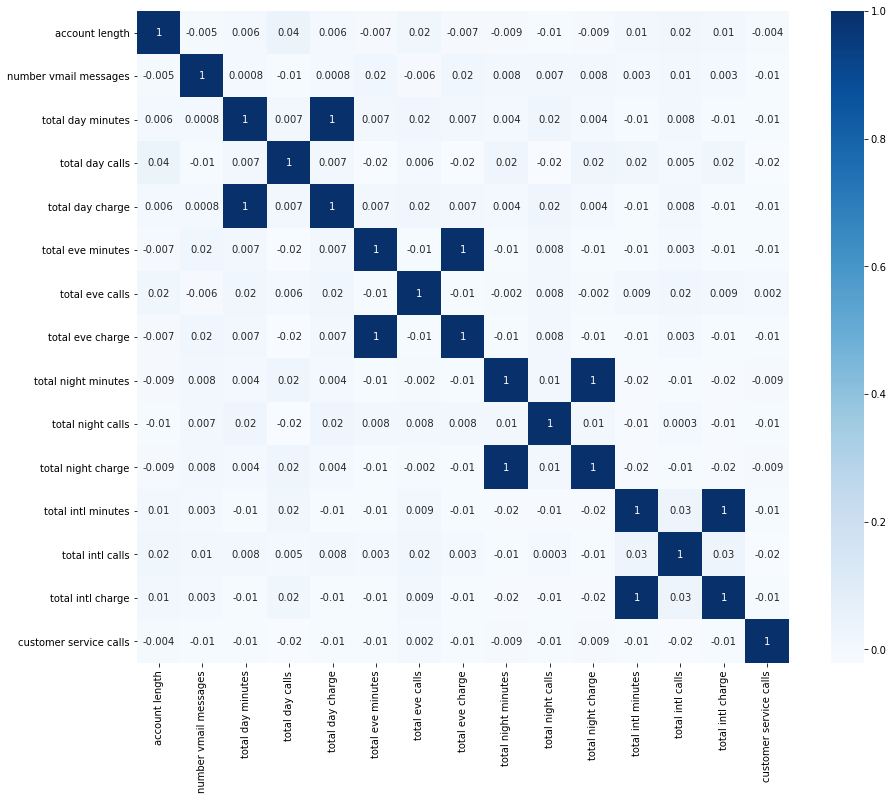

In [12]:
corr_mat = df[numeric_features].corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Most of the numerical features are not correlated however some do share a perfect correlation. It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used. The perfect correlation of 1 indicates the presence of perfect multicollinearity.
- Total day charge and total day minutes features are fully positively correlated.
- Total eve charge and total eve minutes features are fully positively correlated.
- Total night charge and total night minutes features are fully positively correlated.
- Total int charge and total int minutes features are fully positively correlated.

Next, I will drop numerical features with correlation over 0.9 to reduce multicollinearity

In [13]:
print(f"The original dataframe has {df.shape[1]} columns.")
# Calculate the correlation matrix and take the absolute value
corr_matrix = df[numeric_features].corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print(f"The reduced dataframe has {reduced_df.shape[1]} columns.")
print(f"The remaining columns are: {reduced_df.columns.values}")

The original dataframe has 20 columns.
The reduced dataframe has 16 columns.
The remaining columns are: ['state' 'account length' 'area code' 'international plan'
 'voice mail plan' 'number vmail messages' 'total day calls'
 'total day charge' 'total eve calls' 'total eve charge'
 'total night calls' 'total night charge' 'total intl calls'
 'total intl charge' 'customer service calls' 'churn']


### 3. Preprocessing

#### a. Process Categorical Features

Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [14]:
relevant_columns = reduced_df.select_dtypes('object').columns

dummy_dataframe = pd.get_dummies(reduced_df[relevant_columns], drop_first=True, dtype=float)

#### b. Scaling Numerical Features

I will use Min-Max Normalization method to to reduce the effects of outliers in the dataset. By applying the following method, standard deviation issues will be solved. This scaling will only be applied to numerical features.

In [15]:
#Initiate the MinMaxScaler object
scale = MinMaxScaler()
#select only numerical features
num_columns = reduced_df.select_dtypes('number').columns

scaled_dataframe = pd.DataFrame(scale.fit_transform(reduced_df[num_columns]), 
                                columns = num_columns)

#### c. Combine Scaled and Encoded Features

In [16]:
final_df = pd.concat([scaled_dataframe, dummy_dataframe], axis = 1)
final_df.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,0.524793,0.490196,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,0.685185,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,0.609259,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.342975,0.000000,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,0.329630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.305785,0.000000,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,0.505556,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#### d. Splitting Dataset into Train and Test Set

In [31]:
y = df[['churn']]
X = final_df
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)

#### e. Using SMOTE to reduce Class Imbalance

In [34]:
# Previous original class distribution
print(y_train.value_counts()) 

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(y_train_resampled.value_counts()) 

churn
False    2271
True      395
dtype: int64


churn
True     2271
False    2271
dtype: int64


### 4. Modeling

#### a. Logistic Regression

First I will create a base model

In [ ]:
base_logic = LogisticRegression(solver = '')